In [3]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "../Pymaceuticals/mouse_drug_data.csv"
clinical_trial_data_to_load = "../Pymaceuticals/clinicaltrial_data.csv"

In [4]:
# Read the Mouse Data
mouse_drug_pd = pd.read_csv(mouse_drug_data_to_load)

## Tumor Response to Treatment

In [5]:
#Read the Clinical Trial Data
clinical_trial_pd = pd.read_csv(clinical_trial_data_to_load)

In [6]:
# Combine the data into a single dataset
# Display the data table for preview
drug_clinical_data = pd.merge(mouse_drug_pd, clinical_trial_pd, on='Mouse ID', how="right")
drug_clinical_data.columns


Index(['Mouse ID', 'Drug', 'Timepoint', 'Tumor Volume (mm3)',
       'Metastatic Sites'],
      dtype='object')

In [7]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume_by_drug_timepoint_groupby = drug_clinical_data.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)']

#Reset index
mean_tumor_volume_by_drug_timepoint = mean_tumor_volume_by_drug_timepoint_groupby.reset_index()

# Convert to DataFrame
mean_tumor_volume_by_drug_timepoint_df = pd.DataFrame(mean_tumor_volume_by_drug_timepoint)

In [8]:
# Preview DataFrame
mean_tumor_volume_by_drug_timepoint_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [9]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error_tumor_volume_grouped_by_drug_timepoint = drug_clinical_data.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)']

# Convert to DataFrame
standard_error_tumor_volume_grouped_by_drug_timepoint_df = pd.DataFrame(standard_error_tumor_volume_grouped_by_drug_timepoint)

# Reset Index
reset_index_standard_error_tumor_volume_grouped_by_drug_timepoint_df = standard_error_tumor_volume_grouped_by_drug_timepoint_df.reset_index()
reset_index_standard_error_tumor_volume_grouped_by_drug_timepoint_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [10]:
# Minor Data Munging to Re-Format the Data Frames(Mean Tumor Volume)
data_munged_mean_tumor_volume_by_drug_timepoint_groupby = mean_tumor_volume_by_drug_timepoint.pivot(columns='Drug',index='Timepoint')['Tumor Volume (mm3)']
data_munged_mean_tumor_volume_by_drug_timepoint_groupby.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [11]:
# Minor Data Munging to Re-Format the Data Frames(Standard Error)
data_munged_reset_index_standard_error_tumor_volume_grouped_by_drug_timepoint_df = reset_index_standard_error_tumor_volume_grouped_by_drug_timepoint_df.pivot(columns='Drug',index='Timepoint')['Tumor Volume (mm3)']
data_munged_reset_index_standard_error_tumor_volume_grouped_by_drug_timepoint_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


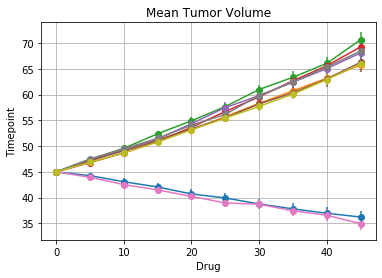

In [12]:
# Generate the Plot (with Error Bars)
plt.errorbar(data_munged_reset_index_standard_error_tumor_volume_grouped_by_drug_timepoint_df.index,data_munged_mean_tumor_volume_by_drug_timepoint_groupby['Capomulin'], marker="o", yerr=data_munged_reset_index_standard_error_tumor_volume_grouped_by_drug_timepoint_df['Capomulin'])
plt.errorbar(data_munged_reset_index_standard_error_tumor_volume_grouped_by_drug_timepoint_df.index,data_munged_mean_tumor_volume_by_drug_timepoint_groupby['Infubinol'], marker="o", yerr=data_munged_reset_index_standard_error_tumor_volume_grouped_by_drug_timepoint_df['Infubinol'])
plt.errorbar(data_munged_reset_index_standard_error_tumor_volume_grouped_by_drug_timepoint_df.index,data_munged_mean_tumor_volume_by_drug_timepoint_groupby['Ketapril'], marker="o", yerr=data_munged_reset_index_standard_error_tumor_volume_grouped_by_drug_timepoint_df['Ketapril'])
plt.errorbar(data_munged_reset_index_standard_error_tumor_volume_grouped_by_drug_timepoint_df.index,data_munged_mean_tumor_volume_by_drug_timepoint_groupby['Naftisol'], marker="o", yerr=data_munged_reset_index_standard_error_tumor_volume_grouped_by_drug_timepoint_df['Naftisol'])
plt.errorbar(data_munged_reset_index_standard_error_tumor_volume_grouped_by_drug_timepoint_df.index,data_munged_mean_tumor_volume_by_drug_timepoint_groupby['Placebo'], marker="o", yerr=data_munged_reset_index_standard_error_tumor_volume_grouped_by_drug_timepoint_df['Placebo'])
plt.errorbar(data_munged_reset_index_standard_error_tumor_volume_grouped_by_drug_timepoint_df.index,data_munged_mean_tumor_volume_by_drug_timepoint_groupby['Propriva'], marker="o", yerr=data_munged_reset_index_standard_error_tumor_volume_grouped_by_drug_timepoint_df['Propriva'])
plt.errorbar(data_munged_reset_index_standard_error_tumor_volume_grouped_by_drug_timepoint_df.index,data_munged_mean_tumor_volume_by_drug_timepoint_groupby['Ramicane'], marker="o", yerr=data_munged_reset_index_standard_error_tumor_volume_grouped_by_drug_timepoint_df['Ramicane'])
plt.errorbar(data_munged_reset_index_standard_error_tumor_volume_grouped_by_drug_timepoint_df.index,data_munged_mean_tumor_volume_by_drug_timepoint_groupby['Stelasyn'], marker="o", yerr=data_munged_reset_index_standard_error_tumor_volume_grouped_by_drug_timepoint_df['Stelasyn'])
plt.errorbar(data_munged_reset_index_standard_error_tumor_volume_grouped_by_drug_timepoint_df.index,data_munged_mean_tumor_volume_by_drug_timepoint_groupby['Zoniferol'], marker="o", yerr=data_munged_reset_index_standard_error_tumor_volume_grouped_by_drug_timepoint_df['Zoniferol'])


plt.title("Mean Tumor Volume")
plt.ylabel("Timepoint")
plt.xlabel('Drug')
plt.grid(True)
plt.show()

In [13]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [14]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_tumor_volume_by_metsite_groupby = drug_clinical_data.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites']

#Reset index
metsite_by_drug_timepoint = mean_tumor_volume_by_metsite_groupby.reset_index()

# Convert to DataFrame
metsite_by_drug_timepoint_df = pd.DataFrame(metsite_by_drug_timepoint)

# Preview DataFrame
metsite_by_drug_timepoint_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [15]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
standard_error_metsite_grouped_by_drug_timepoint = drug_clinical_data.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites']

# Convert to DataFrame
standard_error_metsite_grouped_by_drug_timepoint_df = pd.DataFrame(standard_error_metsite_grouped_by_drug_timepoint)

# Reset Index
reset_index_standard_error_metsite_grouped_by_drug_timepoint_df = standard_error_metsite_grouped_by_drug_timepoint_df.reset_index()

# Preview DataFrame
reset_index_standard_error_metsite_grouped_by_drug_timepoint_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [16]:
# Minor Data Munging to Re-Format the Data Frames
data_munged_mean_metsite_by_drug_timepoint_groupby = metsite_by_drug_timepoint_df.pivot(columns='Drug',index='Timepoint')['Metastatic Sites']

# Preview that Reformatting worked
data_munged_mean_metsite_by_drug_timepoint_groupby.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [17]:
# Minor Data Munging to Re-Format the Data Frames(Standard Error)
data_munged_reset_index_standard_error_metsite_grouped_by_drug_timepoint_df = reset_index_standard_error_metsite_grouped_by_drug_timepoint_df.pivot(columns='Drug',index='Timepoint')['Metastatic Sites']
data_munged_reset_index_standard_error_metsite_grouped_by_drug_timepoint_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


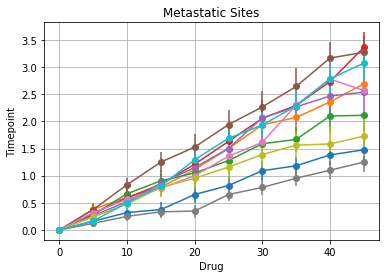

In [18]:
# Generate the Plot (with Error Bars)
plt.errorbar(data_munged_reset_index_standard_error_metsite_grouped_by_drug_timepoint_df.index,data_munged_mean_metsite_by_drug_timepoint_groupby['Capomulin'], marker="o", yerr=data_munged_reset_index_standard_error_metsite_grouped_by_drug_timepoint_df['Capomulin'])
plt.errorbar(data_munged_reset_index_standard_error_metsite_grouped_by_drug_timepoint_df.index,data_munged_mean_metsite_by_drug_timepoint_groupby['Ceftamin'], marker="o", yerr=data_munged_reset_index_standard_error_metsite_grouped_by_drug_timepoint_df['Ceftamin'])
plt.errorbar(data_munged_reset_index_standard_error_metsite_grouped_by_drug_timepoint_df.index,data_munged_mean_metsite_by_drug_timepoint_groupby['Infubinol'], marker="o", yerr=data_munged_reset_index_standard_error_metsite_grouped_by_drug_timepoint_df['Infubinol'])
plt.errorbar(data_munged_reset_index_standard_error_metsite_grouped_by_drug_timepoint_df.index,data_munged_mean_metsite_by_drug_timepoint_groupby['Ketapril'], marker="o", yerr=data_munged_reset_index_standard_error_metsite_grouped_by_drug_timepoint_df['Ketapril'])
plt.errorbar(data_munged_reset_index_standard_error_metsite_grouped_by_drug_timepoint_df.index,data_munged_mean_metsite_by_drug_timepoint_groupby['Naftisol'], marker="o", yerr=data_munged_reset_index_standard_error_metsite_grouped_by_drug_timepoint_df['Naftisol'])
plt.errorbar(data_munged_reset_index_standard_error_metsite_grouped_by_drug_timepoint_df.index,data_munged_mean_metsite_by_drug_timepoint_groupby['Placebo'], marker="o", yerr=data_munged_reset_index_standard_error_metsite_grouped_by_drug_timepoint_df['Placebo'])
plt.errorbar(data_munged_reset_index_standard_error_metsite_grouped_by_drug_timepoint_df.index,data_munged_mean_metsite_by_drug_timepoint_groupby['Propriva'], marker="o", yerr=data_munged_reset_index_standard_error_metsite_grouped_by_drug_timepoint_df['Propriva'])
plt.errorbar(data_munged_reset_index_standard_error_metsite_grouped_by_drug_timepoint_df.index,data_munged_mean_metsite_by_drug_timepoint_groupby['Ramicane'], marker="o", yerr=data_munged_reset_index_standard_error_metsite_grouped_by_drug_timepoint_df['Ramicane'])
plt.errorbar(data_munged_reset_index_standard_error_metsite_grouped_by_drug_timepoint_df.index,data_munged_mean_metsite_by_drug_timepoint_groupby['Stelasyn'], marker="o", yerr=data_munged_reset_index_standard_error_metsite_grouped_by_drug_timepoint_df['Stelasyn'])
plt.errorbar(data_munged_reset_index_standard_error_metsite_grouped_by_drug_timepoint_df.index,data_munged_mean_metsite_by_drug_timepoint_groupby['Zoniferol'], marker="o", yerr=data_munged_reset_index_standard_error_metsite_grouped_by_drug_timepoint_df['Zoniferol'])


plt.title('Metastatic Sites')
plt.ylabel('Timepoint')
plt.xlabel('Drug')
plt.grid(True)

# Save the Figure
plt.savefig("../Pymaceuticals/matplotlib-challenge-metsites.png")

# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [19]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count_by_drug_timepoint_groupby = drug_clinical_data.groupby(['Drug', 'Timepoint']).count()['Mouse ID']

In [20]:
# Reset Index
reset_index_mouseid_grouped_by_drug_timepoint_df = mice_count_by_drug_timepoint_groupby.reset_index()

# Preview Reset Index
reset_index_mouseid_grouped_by_drug_timepoint_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [21]:
# Convert to DataFrame
mice_count_by_drug_timepoint_groupby_df = pd.DataFrame(reset_index_mouseid_grouped_by_drug_timepoint_df)

# Preview DataFrame
mice_count_by_drug_timepoint_groupby_df.columns

Index(['Drug', 'Timepoint', 'Mouse ID'], dtype='object')

In [22]:
# Minor Data Munging to Re-Format the Data Frames
data_munged_reset_index_mouseid_grouped_by_drug_timepoint_df = mice_count_by_drug_timepoint_groupby_df.pivot(columns='Drug',index='Timepoint')['Mouse ID']
# Preview the Data Frame
data_munged_reset_index_mouseid_grouped_by_drug_timepoint_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [23]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
standard_error_mice_grouped_by_drug_timepoint = drug_clinical_data.groupby(['Drug','Timepoint']).sem()['Mouse ID']

# Convert to DataFrame
standard_error_mice_grouped_by_drug_timepoint_df = pd.DataFrame(standard_error_mice_grouped_by_drug_timepoint)

# Reset Index
reset_index_standard_error_mice_grouped_by_drug_timepoint_df = standard_error_mice_grouped_by_drug_timepoint_df.reset_index()

# Preview DataFrame
reset_index_standard_error_mice_grouped_by_drug_timepoint_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,NaN
1,Capomulin,5,NaN
2,Capomulin,10,NaN
3,Capomulin,15,NaN
4,Capomulin,20,NaN


In [24]:
# Minor Data Munging to Re-Format the Data Frames (Standard Error)
data_munged_mice_by_drug_timepoint_groupby = reset_index_standard_error_mice_grouped_by_drug_timepoint_df.pivot(columns='Drug',index='Timepoint')['Mouse ID']

# Preview that Reformatting worked
data_munged_mice_by_drug_timepoint_groupby.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


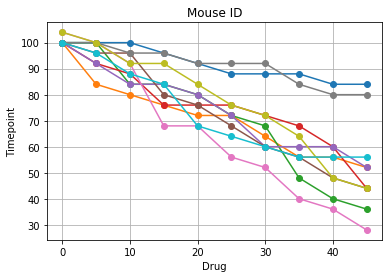

In [25]:
# Generate the Scatter Plot (Accounting for percentages)
plt.errorbar(data_munged_mice_by_drug_timepoint_groupby.index,data_munged_reset_index_mouseid_grouped_by_drug_timepoint_df['Capomulin']/25*100, marker="o", yerr=data_munged_mice_by_drug_timepoint_groupby['Capomulin']/25*100)
plt.errorbar(data_munged_mice_by_drug_timepoint_groupby.index,data_munged_reset_index_mouseid_grouped_by_drug_timepoint_df['Ceftamin']/25*100, marker="o", yerr=data_munged_mice_by_drug_timepoint_groupby['Ceftamin']/25*100)
plt.errorbar(data_munged_mice_by_drug_timepoint_groupby.index,data_munged_reset_index_mouseid_grouped_by_drug_timepoint_df['Infubinol']/25*100, marker="o", yerr=data_munged_mice_by_drug_timepoint_groupby['Infubinol']/25*100)
plt.errorbar(data_munged_mice_by_drug_timepoint_groupby.index,data_munged_reset_index_mouseid_grouped_by_drug_timepoint_df['Ketapril']/25*100, marker="o", yerr=data_munged_mice_by_drug_timepoint_groupby['Ketapril']/25*100)
plt.errorbar(data_munged_mice_by_drug_timepoint_groupby.index,data_munged_reset_index_mouseid_grouped_by_drug_timepoint_df['Naftisol']/25*100, marker="o", yerr=data_munged_mice_by_drug_timepoint_groupby['Naftisol']/25*100)
plt.errorbar(data_munged_mice_by_drug_timepoint_groupby.index,data_munged_reset_index_mouseid_grouped_by_drug_timepoint_df['Placebo']/25*100, marker="o", yerr=data_munged_mice_by_drug_timepoint_groupby['Placebo']/25*100)
plt.errorbar(data_munged_mice_by_drug_timepoint_groupby.index,data_munged_reset_index_mouseid_grouped_by_drug_timepoint_df['Propriva']/25*100, marker="o", yerr=data_munged_mice_by_drug_timepoint_groupby['Propriva']/25*100)
plt.errorbar(data_munged_mice_by_drug_timepoint_groupby.index,data_munged_reset_index_mouseid_grouped_by_drug_timepoint_df['Ramicane']/25*100, marker="o", yerr=data_munged_mice_by_drug_timepoint_groupby['Ramicane']/25*100)
plt.errorbar(data_munged_mice_by_drug_timepoint_groupby.index,data_munged_reset_index_mouseid_grouped_by_drug_timepoint_df['Stelasyn']/25*100, marker="o", yerr=data_munged_mice_by_drug_timepoint_groupby['Stelasyn']/25*100)
plt.errorbar(data_munged_mice_by_drug_timepoint_groupby.index,data_munged_reset_index_mouseid_grouped_by_drug_timepoint_df['Zoniferol']/25*100, marker="o", yerr=data_munged_mice_by_drug_timepoint_groupby['Zoniferol']/25*100)

plt.title('Mouse ID')
plt.ylabel('Timepoint')
plt.xlabel('Drug')
plt.grid(True)

# Save the Figure
plt.savefig("../Pymaceuticals/matplotlib-challenge-survival-rate.png")
plt.show()


![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [26]:
# Calculate the percent changes for each drug
capomulin_drug_percent = (data_munged_mean_tumor_volume_by_drug_timepoint_groupby['Capomulin'].iloc[9]-data_munged_mean_tumor_volume_by_drug_timepoint_groupby['Capomulin'].iloc[0])/data_munged_mean_tumor_volume_by_drug_timepoint_groupby['Capomulin'].iloc[0]*100

# Display the data to confirm
capomulin_drug_percent

-19.475302667894173

In [27]:
# Calculate the percent changes for each drug
ceftamin_drug_percent = (data_munged_mean_tumor_volume_by_drug_timepoint_groupby['Ceftamin'].iloc[9]-data_munged_mean_tumor_volume_by_drug_timepoint_groupby['Ceftamin'].iloc[0])/data_munged_mean_tumor_volume_by_drug_timepoint_groupby['Ceftamin'].iloc[0]*100

# Display the data to confirm
ceftamin_drug_percent

42.51649185589744

In [28]:
# Calculate the percent changes for each drug
infubinol_drug_percent = (data_munged_mean_tumor_volume_by_drug_timepoint_groupby['Infubinol'].iloc[9]-data_munged_mean_tumor_volume_by_drug_timepoint_groupby['Infubinol'].iloc[0])/data_munged_mean_tumor_volume_by_drug_timepoint_groupby['Infubinol'].iloc[0]*100

# Display the data to confirm
infubinol_drug_percent

46.12347172785187

In [29]:
# Calculate the percent changes for each drug
ketapril_drug_percent = (data_munged_mean_tumor_volume_by_drug_timepoint_groupby['Ketapril'].iloc[9]-data_munged_mean_tumor_volume_by_drug_timepoint_groupby['Ketapril'].iloc[0])/data_munged_mean_tumor_volume_by_drug_timepoint_groupby['Ketapril'].iloc[0]*100

# Display the data to confirm
ketapril_drug_percent

57.028794686606076

In [30]:
# Calculate the percent changes for each drug
naftisol_drug_percent = (data_munged_mean_tumor_volume_by_drug_timepoint_groupby['Naftisol'].iloc[9]-data_munged_mean_tumor_volume_by_drug_timepoint_groupby['Naftisol'].iloc[0])/data_munged_mean_tumor_volume_by_drug_timepoint_groupby['Naftisol'].iloc[0]*100

# Display the data to confirm
naftisol_drug_percent

53.92334713476923

In [31]:
# Calculate the percent changes for each drug
placebo_drug_percent = (data_munged_mean_tumor_volume_by_drug_timepoint_groupby['Placebo'].iloc[9]-data_munged_mean_tumor_volume_by_drug_timepoint_groupby['Placebo'].iloc[0])/data_munged_mean_tumor_volume_by_drug_timepoint_groupby['Placebo'].iloc[0]*100

# Display the data to confirm
placebo_drug_percent

51.29796048315153

In [32]:
# Calculate the percent changes for each drug
propriva_drug_percent = (data_munged_mean_tumor_volume_by_drug_timepoint_groupby['Propriva'].iloc[9]-data_munged_mean_tumor_volume_by_drug_timepoint_groupby['Propriva'].iloc[0])/data_munged_mean_tumor_volume_by_drug_timepoint_groupby['Propriva'].iloc[0]*100

# Display the data to confirm
propriva_drug_percent

47.24117486320637

In [33]:
# Calculate the percent changes for each drug
ramicane_drug_percent = (data_munged_mean_tumor_volume_by_drug_timepoint_groupby['Ramicane'].iloc[9]-data_munged_mean_tumor_volume_by_drug_timepoint_groupby['Ramicane'].iloc[0])/data_munged_mean_tumor_volume_by_drug_timepoint_groupby['Ramicane'].iloc[0]*100

# Display the data to confirm
ramicane_drug_percent

-22.320900462766673

In [34]:
# Calculate the percent changes for each drug
stelasyn_drug_percent = (data_munged_mean_tumor_volume_by_drug_timepoint_groupby['Stelasyn'].iloc[9]-data_munged_mean_tumor_volume_by_drug_timepoint_groupby['Stelasyn'].iloc[0])/data_munged_mean_tumor_volume_by_drug_timepoint_groupby['Stelasyn'].iloc[0]*100

# Display the data to confirm
stelasyn_drug_percent

52.085134287899024

In [35]:
# Calculate the percent changes for each drug
zoniferol_drug_percent = (data_munged_mean_tumor_volume_by_drug_timepoint_groupby['Zoniferol'].iloc[9]-data_munged_mean_tumor_volume_by_drug_timepoint_groupby['Zoniferol'].iloc[0])/data_munged_mean_tumor_volume_by_drug_timepoint_groupby['Zoniferol'].iloc[0]*100

# Display the data to confirm
zoniferol_drug_percent

46.57975086509525

In [36]:
# Store all Relevant Percent Changes into a Tuple
drug_percent_change_tuple = {'Capomulin': capomulin_drug_percent,'Ceftamin': ceftamin_drug_percent, 'Infubinol': infubinol_drug_percent, 'Ketapril': ketapril_drug_percent, 'Placebo': placebo_drug_percent, 'Propriva': propriva_drug_percent, 'Ramicane': ramicane_drug_percent, 'Stelasyn': stelasyn_drug_percent, 'Zoniferol': zoniferol_drug_percent}
total_drug_percent_change = pd.Series(drug_percent_change_tuple)
total_drug_percent_change

Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [37]:
#Convert to a Data Frame
total_drug_percent_change_df =pd.DataFrame(total_drug_percent_change)
total_drug_percent_change_df

,0
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134
Zoniferol,46.579751


In [38]:
reset_index = total_drug_percent_change_df.reset_index()

In [39]:
# Splice the data between passing and failing drugs
drug_percentage_change = {'Capomulin': [capomulin_drug_percent],'Ceftamin': [ceftamin_drug_percent], 'Infubinol': [infubinol_drug_percent], 'Ketapril': [ketapril_drug_percent], 'Placebo': [placebo_drug_percent], 'Propriva': [propriva_drug_percent], 'Ramicane': [ramicane_drug_percent], 'Stelasyn': [stelasyn_drug_percent], 'Zoniferol': [zoniferol_drug_percent]}

In [40]:
drug_percentage_change
df = pd.DataFrame(drug_percentage_change)
df.head()

,Capomulin,Ceftamin,Infubinol,Ketapril,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,-19.475303,42.516492,46.123472,57.028795,51.29796,47.241175,-22.3209,52.085134,46.579751


In [41]:
bin_range = [-60,0,60]
passing_failing_drugs_groups = ['Passing Drugs','Failing Drugs']
colors = {'Passing Drugs': 'blue',
          'Failing Drugs': 'red'}

In [45]:

x = pd.cut(list(drug_percent_change_tuple.values()), bin_range, labels=passing_failing_drugs_groups)  
total_drug_percent_change_df["Pass or Fail"] = x
total_drug_percent_change_df.head()                                           

,0,Pass or Fail
Capomulin,-19.475303,Passing Drugs
Ceftamin,42.516492,Failing Drugs
Infubinol,46.123472,Failing Drugs
Ketapril,57.028795,Failing Drugs
Placebo,51.297960,Failing Drugs


![Metastatic Spread During Treatment](../Images/change.png)

NameError: name 'blue' is not defined

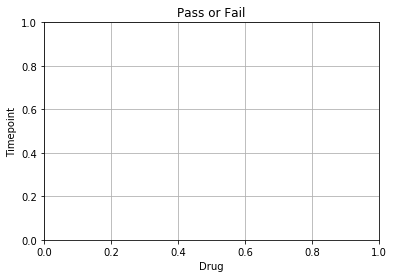

In [51]:
# Add labels, tick marks, etc. 
plt.title('Pass or Fail')
plt.ylabel('Timepoint')
plt.xlabel('Drug')
plt.grid(True)

plt.bar(x,'Pass or Fail',facecolor=red,alpha=0.75)
plt.xticks('Drug','Timepoint')

# Save the Figure
plt.savefig("../Pymaceuticals/matplotlib-challenge-summary-bar-graph.png")

# Show the Figure
plt.show